In [49]:
%load_ext autoreload
%autoreload 2
from draw3d import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Exercise 3.2—Mini Project 
There are exactly eight 3D vectors whose coordinates are all either +1 or –1. For instance, (1, –1, 1) is one of these. Plot all of these eight vectors as points. Then figure out how to connect them with line segments using Segment3D objects to form the outline of a cube.

Hint You’ll need 12 segments in total.

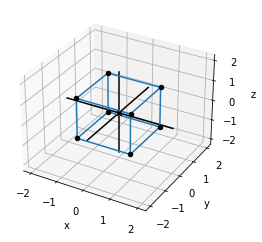

In [6]:
def exercise_3_2():
    points = [(x, y, z) for x in [1, -1] for y in [1, -1] for z in [1, -1]]
    segments = [Segment3D(p1, p2)
            for i, p1 in enumerate(points)
            for p2 in points[i+1:len(points)]
            if sum([1 if a == b else 0 for a, b in zip(p1, p2)]) >= 2]

    draw3d(
        Points3D(*points), 
        *segments
    )
    
exercise_3_2()

#### Exercise 3.3 
Draw (4, 0, 3) and (–1, 0, 1) as Arrow3D objects, such that they are placed tip-to-tail in both orders in 3D. What is their vector sum?

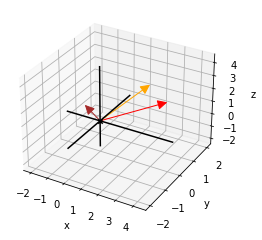

In [10]:
def add(*vectors):
    return tuple([sum(z) for z in zip(*vectors)])

def exercise_3_3():
    v1 = (4, 0, 3) 
    v2 = (-1, 0, 1)
    v3 = 
    draw3d(
        Arrow3D(v1, color="red"),
        Arrow3D(v2, color="brown"),
        Arrow3D(add(v1, v2), color="orange")
    )
    
exercise_3_3()

#### Exercise 3.5—Mini Project 
The following comprehension creates a list of 24 Python vectors:
from math import sin, cos, pi
vs = [(sin(pi*t/6), cos(pi*t/6), 1.0/3) for t in range(0,24)]
What is the sum of the 24 vectors? Draw all 24 of them tip-to-tail as Arrow3D objects.

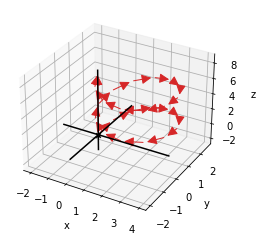

In [27]:
from math import sin, cos, pi
def exercise_3_5():
    vs = [(sin(pi*t/6), cos(pi*t/6), 1.0/3) for t in range(0,24)]
    vss = add(*vs)
    av = []
    for i, v in enumerate(vs):
        w = av[-1] if i > 0 else (0, 0, 0)
        av.append(add(w, v))

    arrows = [Arrow3D(v, tail=av[i - 1] if i > 0 else (0, 0, 0)) for i,v in enumerate(av)]
    draw3d(Arrow3D(vss), *arrows)

exercise_3_5()

#### Exercise 3.6 
Write a function `scale(scalar,vector)` that returns the input scalar times the input vector. Specifically, write it so it works on 2D or 3D vectors, or vectors of any number of coordinates.

In [18]:
def scale(scalar, vector):
    return tuple([x * scalar for x in vector])

def exercise_3_6():
    print(scale(2, (3, 4, 5, 6, 7)))

exercise_3_6()

(6, 8, 10, 12, 14)


#### Exercise 3.7 
Let `u = (1, –1, –1)` and `v = (0, 0, 2)`. What is the result of `u + 1⁄2 · (v – u)`?

u = (1, -1, -1)
v = (0, 0, 2)
vmu = (-1, 1, 3)
vmus = (-0.5, 0.5, 1.5)
vmusu = (0.5, -0.5, 0.5)

#### Exercise 3.9—Mini Project 
The coordinates 3, 4, 12 in any order create a vector of length 13, a whole number. This is unusual because most numbers are not perfect squares, so the square root in the length formula typically returns an irrational number. Find a different triple of whole numbers that define coordinates of a vector with a whole number length.

In [39]:
def length(vector):
    return sqrt(sum([x ** 2 for x in vector]))
    
def exercise_3_7():
    print([(x, y, z) 
           for x in range(2, 10) 
           for y in range(2, 10) 
           for z in range(2, 10) 
           if length((x, y, z)).is_integer()])
    

exercise_3_7()

[(2, 3, 6), (2, 4, 4), (2, 6, 3), (2, 6, 9), (2, 9, 6), (3, 2, 6), (3, 6, 2), (3, 6, 6), (4, 2, 4), (4, 4, 2), (4, 4, 7), (4, 7, 4), (4, 8, 8), (6, 2, 3), (6, 2, 9), (6, 3, 2), (6, 3, 6), (6, 6, 3), (6, 6, 7), (6, 7, 6), (6, 9, 2), (7, 4, 4), (7, 6, 6), (8, 4, 8), (8, 8, 4), (9, 2, 6), (9, 6, 2)]


#### Exercise 3.10 
Find a vector in the same direction as (–1, –1, 2) but which has length 1.

**Hint** Find the appropriate scalar to multiply the original vector to change its length appropriately.

In [41]:
def exercise_3_10():
    v = (-1, -1, 2)
    l = length(v)
    s = 1/l
    nv = scale(s, v)
    print(s)
    print(nv)
    
exercise_3_10()

0.4082482904638631
(-0.4082482904638631, -0.4082482904638631, 0.8164965809277261)


#### Exercise 3.11 
Based on the following picture, rank u · v, u · w, and v · w from largest to smallest:

The vectors in the image are:
```
u = (-4, 1) 
v = (1, 2) 
w = (4, 2)

v · w = 8
u · v = -2
u · w = -14
```


#### Exercise 3.12 
What is the dot product of (–1, –1, 1) and (1, 2, 1)? Are these two 3D vectors separated by more than 90°, less than 90°, or exactly 90°?

```
(-1, -1, 1) · (1, 2, 1) = -1 + -2 + 1 = -2
```
Since it's a negative dot product, the two vectors are separated by more than 90 degrees.

#### Exercise 3.13—Mini Project 
For two 3D vectors u and v, the values of `(2u) · v` and `u · (2v)` are both equal to `2(u · v)`. In this case, `u · v = 18` and both `(2u) · v` and `u · (2v)` are 36, twice the original result. Show that this works for any real number s, not just 2. In other words, show that for any s the values of `(su) · v` and `u · (sv)` are both equal to `s(u · v)`.

In [20]:
def multiply_vector(vector):
    product = 1
    for n in vector:
        product = n * product
    return product

def dot(*vectors):
    return sum([multiply_vector(v) for v in zip(*vectors)])

def exercise_3_13():
    u = (2, 3, 4)
    v = (5, 6, 7)
    return all([dot(scale(s, u), v) == dot(scale(s, v), u) and dot(scale(s, u), v) == s * dot(u, v) for s in range(1, 100)])
    

print(exercise_3_13())

True


#### Exercise 3.16 
Let u and v be vectors, with |u| = 3.61 and |v| = 1.44. If the angle between u and v is 101.3°, what is u · v?
1. 5.198
2. 5.098 
3. 3 –1.019 
4. 1.019

$cos(\theta) = \dfrac{u \cdot v}{|u| \cdot |v|}$

$cos(101.3) = \dfrac{u \cdot v}{3.61 \cdot 1.44}$

$u \cdot v = cos(101.3) \cdot {3.61 \cdot 1.44}$

$u \cdot v = -1.018606436230304$

#### Exercise 3.17—Mini Project 
Find the angle between (3, 4) and (4, 3) by converting them to polar coordinates and taking the difference of the angles. The answer is

1. 1.569  
2. 0.927  
3. 0.643  
4. 0.284  


In [30]:
from math import degrees, atan2
def v_length(vector):
    return sqrt(sum([x ** 2 for x in vector]))
    
def to_polar(*vectors):
    return [(v_length(v), atan2(v[1], v[0])) for v in vectors]
    
def exercise_3_17():
    u = (3, 4)
    v = (4, 3)
    up, vp = to_polar(u, v)
    print(up[1] - vp[1])

exercise_3_17()
    

0.2837941092083278


#### Exercise 3.18 
What is the angle between (1, 1, 1) and (–1, –1, 1) in degrees?

1. 180°
2. 120°
3. 109.5° 
4. 90°

$cos(\theta) = \dfrac{u \cdot v}{|u| \cdot |v|}$

$\theta = acos(\dfrac{u \cdot v}{|u| \cdot |v|})$

$\theta = acos(\dfrac{-1}{3})$



In [40]:
from math import acos
degrees(acos(-1/3))


109.47122063449069

#### Exercise 3.22 
What are the coordinates of the cross product of (1, –2, 1) and (–6, 12, –6)?

In [41]:
def cross(u, v):
    ux, uy, uz = u
    vx, vy, vz = v
    return (uy * vz - uz * vy, uz * vx - ux * vz, ux * vy - uy * vx)

def exercise_3_22():
    print(cross((1, -2, 1), (-6, 12, -6)))
    
exercise_3_22()

(0, 0, 0)


### Exercise 3.24 

What is the result of the cross product (1, 0, 1) × (–1, 0, 0)?

In [44]:
def exercise_3_24():
    print(cross((1, 0, 1), (-1, 0, 0)))
    
exercise_3_24()

(0, -1, 0)


#### Exercise 3.27—Mini Project 
Find pairs of vectors defining each of the 12 edges of the octahedron and draw all of the edges in Python.

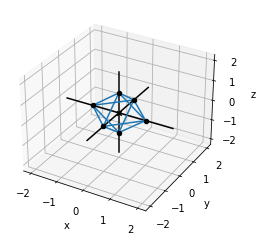

In [59]:
def exercise_3_27():
    points = [(1, 0, 0), (-1, 0, 0), (0, 1, 0), (0, -1, 0), (0, 0, 1), (0, 0, -1)]
    segments = [Segment3D(p, q) for i,p in enumerate(points) for q in points[i+1:] if not scale(-1, p) == q]
    draw3d(Points3D(*points),
          *segments)

exercise_3_27()